# Assignment for Week 7 - Performance Evaluations
## Project:
### Performance Evaluations: ROC and PR Curves
Bank Marketing data: https://archive.ics.uci.edu/ml/datasets/bank+marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

From the given data set, complete the following:

- Try 3 different types of models to make classification predictions on the bank marketing dataset
- Calculate the AUC score as a comparison, and at least 2 other metrics (ie: accuracy, F1 score, precision, recall, etc)
  - Compare the models’ performance on the same train/test splits
- Plot the ROC curve from the best model, choose what you think the best threshold value is for making predictions

## Deliverables:
Upload your notebook's .ipynb file.

**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

## Introduction
***

In this weeks assignment we will be using three different classification models on our bank marketing dataset and comparing them using a few performance evalutaions. We will be calculating the AUC, along with accuracy, precision, recall, and f1 using the same train and test split on our data. We will also plot the corresponding confusion matrices and ROC curves. After identifying the best model from our suite we will discuss what the best threshold value for making predictions with it.

**Setup**

The three models that I have decided to use for this weeks assignment are the Random Forest Classifier, the XGBoost Classifier, and then using auto ML with the TPOT classifier. TPOT is technically going to search through many different types of classifiers and will export the optimal pipeline at the end so we might end up with a duplicate classifier but with tweaked parameters.

In [45]:
# data science data structures
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

# performance metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve

# Sklearn utilities
from sklearn.model_selection import train_test_split

# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# XGBoost Classifier Model
from xgboost import XGBClassifier

# TPOT Classifier
from tpot import TPOTClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
!head bank-additional-full.csv

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

It looks like we have a lot of categorical data, so we will want to see how many classes we are working with and then I plan on doing one hot encoding on our dataset before training our models.

In [5]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [6]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [7]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [8]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [9]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [10]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [11]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [12]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [13]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [14]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [15]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<AxesSubplot:>

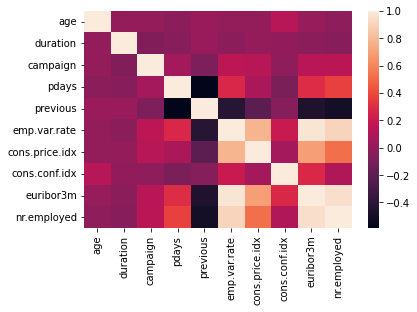

In [16]:
sns.heatmap(df.corr())

Our target feature 'y' does not need one hot encoding but instead just mapped over to 1 or 0 so we will do that before we do our other encoding.

In [17]:
# Encode our target values

df['y'].replace({'yes': 1, 'no': 0}, inplace=True)
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [18]:
# One hot encoding for our other categorical features

one_hot = pd.get_dummies(df)
one_hot

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [19]:
one_hot.corr()['y']

age                     0.030399
duration                0.405274
campaign               -0.066357
pdays                  -0.324914
previous                0.230181
                          ...   
day_of_week_tue         0.008046
day_of_week_wed         0.006302
poutcome_failure        0.031799
poutcome_nonexistent   -0.193507
poutcome_success        0.316269
Name: y, Length: 64, dtype: float64

We are now ready to split our data and train our models.

**Split Train and Test**

In [20]:
# Adapted from https://worldclass.regis.edu/d2l/le/content/287315/viewContent/4178156/View
# get column names
cols = one_hot.columns

# split column names into target and features
target = 'y'
features = [col for col in cols if col != target]

x = one_hot[features].values
y = one_hot[target].values

# split dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Models: Random Forest Classifier**

Our first model is the Random Forest Classifier which is an ensemble of decision trees.

In [21]:
# Adapted from https://worldclass.regis.edu/d2l/le/content/287315/viewContent/4178156/View
# establish and fit the model using DecisonTree()
tree_model = RandomForestClassifier()
tree_model.fit(x_train, y_train)

# store predictions
preds = tree_model.predict(x_test)

In [22]:
acc = accuracy_score(y_test, preds)
prc = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)
cm = confusion_matrix(y_test, preds)

In [23]:
print(f'Accuracy: {acc:.3f}')
print(f'Precision: {prc:.3f}')
print(f'Recall: {rec:.3f}')
print(f'F1: {f1:.3f}')
print(f'AUC: {auc:.3f}')
print(f'Confusion Matrix: \n{cm}')

Accuracy: 0.909
Precision: 0.647
Recall: 0.435
F1: 0.520
AUC: 0.702
Confusion Matrix: 
[[7081  222]
 [ 528  407]]


Our metrics here are a good baseline for our values. We are wanting to optimize that AUC score for this weeks assignment so 0.702 is our first score.

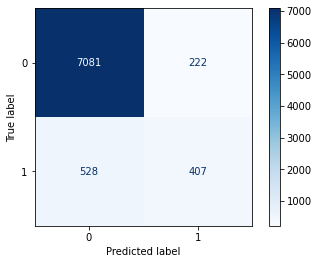

In [24]:
plot_confusion_matrix(tree_model, x_test, y_test, cmap='Blues')

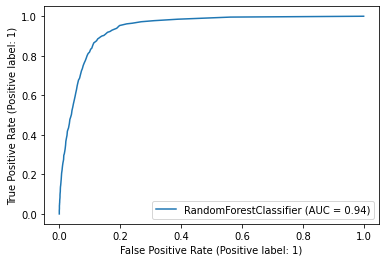

In [25]:
plot_roc_curve(tree_model, x_test, y_test)

**Models: XGBoost Classifier**

In [26]:
# establish and fit the model using XGBClassifier()
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

# store predictions
preds = xgb_model.predict(x_test)

[14:56:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
acc = accuracy_score(y_test, preds)
prc = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)
cm = confusion_matrix(y_test, preds)

In [28]:
print(f'Accuracy: {acc:.3f}')
print(f'Precision: {prc:.3f}')
print(f'Recall: {rec:.3f}')
print(f'F1: {f1:.3f}')
print(f'AUC: {auc:.3f}')
print(f'Confusion Matrix: \n{cm}')

Accuracy: 0.914
Precision: 0.641
Recall: 0.549
F1: 0.591
AUC: 0.755
Confusion Matrix: 
[[7016  287]
 [ 422  513]]


Our general XGBoost classifier ended up with an AUC of 0.755, which puts it in front for now.

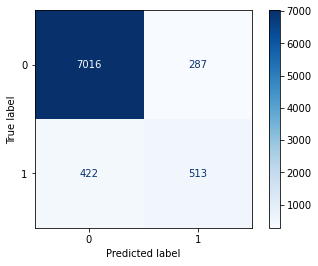

In [29]:
plot_confusion_matrix(xgb_model, x_test, y_test, cmap='Blues')

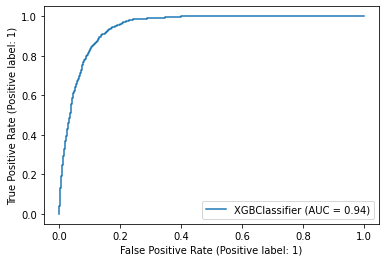

In [30]:
plot_roc_curve(xgb_model, x_test, y_test)

**Models: TPOT Classifier**

In [31]:
# establish and fit the model using TPOTClassifier()
tpot_model = TPOTClassifier(generations=2, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
tpot_model.fit(x_train, y_train)

# store predictions
preds = tpot_model.predict(x_test)

Optimization Progress:   0%|          | 0/60 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9146282245827011

Generation 2 - Current best internal CV score: 0.9146282245827011

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)


In [32]:
tpot_model.export('tpot_optimized_pipeline.py')

In [33]:
acc = accuracy_score(y_test, preds)
prc = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)
cm = confusion_matrix(y_test, preds)

In [34]:
print(f'Accuracy: {acc:.3f}')
print(f'Precision: {prc:.3f}')
print(f'Recall: {rec:.3f}')
print(f'F1: {f1:.3f}')
print(f'AUC: {auc:.3f}')
print(f'Confusion Matrix: \n{cm}')

Accuracy: 0.917
Precision: 0.660
Recall: 0.561
F1: 0.607
AUC: 0.762
Confusion Matrix: 
[[7033  270]
 [ 410  525]]


TPOT's optimal pipeline ended up with an AUC of 0.762 which is the highest of our three models. It also turned out that our TPOT models optimal pipeline is actually another XGBoost Classifier with tweaked parameters.

In [42]:
# Taken from the exported tpot model to for plotting

exported_pipeline = XGBClassifier(learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)
exported_pipeline.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=9, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.45,
              tree_method='exact', validate_parameters=1, verbosity=0)

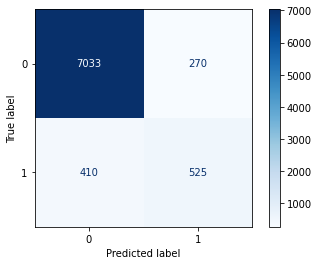

In [43]:
plot_confusion_matrix(exported_pipeline, x_test, y_test, cmap='Blues')

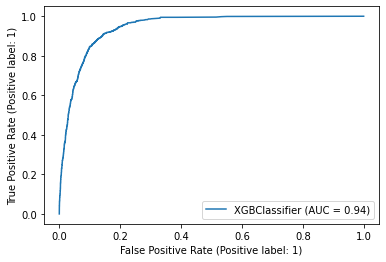

In [44]:
plot_roc_curve(exported_pipeline, x_test, y_test)

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, preds)

In [53]:
print(fpr)

[0.         0.03697111 1.        ]


It looks like our best threshold is at 0.03697 which is approximately the elbow in the ROC curve.

## Conclusion
***

In working through our three separate models we ended up with three different sets of performance measurements.
<br><br>**Performance Measures**<br>
<br>Random Forest, XGBoost, TPOT
- Accuracy: 0.909, 0.914, 0.917
- Precision: 0.647, 0.641, 0.660
- Recall: 0.435, 0.549, 0.561
- F1: 0.520, 0.591, 0.607
- ROC_AUC: 0.702, 0.755, 0.762
<br>

We can see that our performance improved as we transitioned models in every case accept for the precision of XGBoost was lower than the Random Forest. Ultimately our TPOT auto ML optimized model ended up being a tuned XGBoost classifier, and was our best performer.

## References
***

1. Brownlee, J. (2020, February 9). A gentle introduction to threshold-moving for imbalanced classification. Machine Learning Mastery. https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
2. Using tpot—Tpot. (n.d.). Retrieved June 18, 2022, from http://epistasislab.github.io/tpot/using/
3. Uci machine learning repository: Bank marketing data set. (n.d.). Retrieved June 18, 2022, from https://archive.ics.uci.edu/ml/datasets/bank+marketing
